<a href="https://colab.research.google.com/github/venkateshchandle/ml/blob/main/1BM22CS325_Lab_9_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

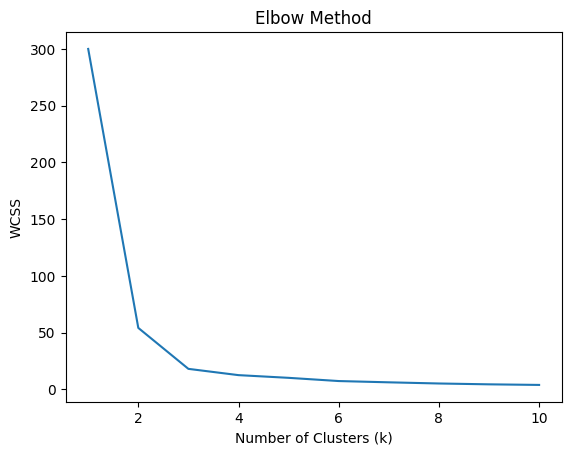

optimal k: 5


In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
# Load the Iris dataset
iris = pd.read_csv('/content/iris.csv')

# Select petal width and length features
X = iris[['petal_width', 'petal_length']]

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal k using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

diff_inertia = np.diff(wcss)

# Calculate the second derivative (rate of change of the differences)
second_diff = np.diff(diff_inertia)

# Find the index where the second derivative is closest to zero (this is our elbow)
optimal_k = np.argmin(second_diff) + 2

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

print("optimal k:",optimal_k)
# Apply K-Means clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

# Add the cluster labels to the original dataset
iris['cluster'] = kmeans.labels_

# To see the cluster assignments, run the following line:
# print(iris[['petal.width', 'petal.length', 'cluster']])